# ModelV2Overlapping
## Object detection on overlapping cards

In [2]:
!pip -q install ultralytics wandb


In [3]:
from ultralytics import YOLO
from jassair.utils.paths import get_dataset_path, Datasets
import wandb
import time
import torch
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

%matplotlib inline

### Global variable definition

In [4]:
# DATA_DIR = get_dataset_path(Datasets.SWISS)
BATCH_SIZE = 16
NUM_CLASSES = 36

In [5]:
torch.cuda.is_available()

True

Enable W&B logging for Ultralytics in CLI

`yolo settings wandb=True`

Disable Weights & Biases logging

`yolo settings wandb=False`

In [6]:
wandb.login()

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aarfu (aarfu-hochschule-luzern) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Model
We can use a singel YOLO model for both, object detection and classification tasks.

In [7]:
MODEL = YOLO("yolo11n.pt") # YOLOv11 large

## Train
imgsz: yolo resizes the input images to a square image. Since jasscards are not square, yolo resizes the long side to 640 and then scales the shorter side proportionally.

In [8]:
# Hyperparameters
# epochs=50
# imgsz=640 # 640 (default) – Balanced performance; 512 – Faster, lower memory usage, 1280+ – Best accuracy for small details but slower.
# iterations=100 # Number of tuning cycles (higher = better tuning). The model tries different values for lr, momentum, weight decay, etc.

HYPERPARAMETERS = {
    "lr0": 1e-3,        # renamed from "lr" to "lr0"
    "weight_decay": 1e-5,  # renamed from "wd"
    "imgsz": 640,
    "epochs": 80,
}

In [57]:
RUN_NAME = f"yolo11l_1to9_36c_ovlp_{time.strftime('%y%m%d-%H%M%S')}"

In [58]:
wandb.init(
    entity="jassair",
    project="ModelV2",  # Specify project
    name=RUN_NAME, # Run name
    config=HYPERPARAMETERS,
)

In [11]:
# Model with all tunable hyperparameters
MODEL.train(
    data="/exchange/dspro2/jassair/s_1to9_36c_ovlp/data.yaml",
    device=0,
    batch=BATCH_SIZE,
    optimizer="Adam",
    momentum=0.937,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    project="jassair",
    name=RUN_NAME,
    patience=10,
    **HYPERPARAMETERS
)


New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.108 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA A16, 14891MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/exchange/dspro2/jassair/s_1to9_36c_ovlp/data.yaml, epochs=80, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=jassair, name=yolo11l_s_1to9_36c_ovlp_250416-174411, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

train: Scanning /exchange/dspro2/jassair/s_1to9_36c_ovlp/train/labels... 3600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3600/3600 [00:17<00:00, 207.20it/s]


train: New cache created: /exchange/dspro2/jassair/s_1to9_36c_ovlp/train/labels.cache


val: Scanning /exchange/dspro2/jassair/s_1to9_36c_ovlp/valid/labels... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:01<00:00, 203.43it/s]

val: New cache created: /exchange/dspro2/jassair/s_1to9_36c_ovlp/valid/labels.cache


Plotting labels to jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to jassair/yolo11l_s_1to9_36c_ovlp_250416-174411
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      2.31G      1.334      3.393      1.374        215        640: 100%|██████████| 225/225 [00:56<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]


                   all        360       2003      0.122      0.304      0.128     0.0848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80       2.7G      1.285       2.59      1.345        182        640: 100%|██████████| 225/225 [00:54<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]

                   all        360       2003      0.297       0.52      0.366      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      2.71G      1.246      2.127      1.341        190        640: 100%|██████████| 225/225 [00:53<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]

                   all        360       2003      0.474      0.572      0.544      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      2.72G      1.214      1.895      1.319        160        640: 100%|██████████| 225/225 [00:53<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]

                   all        360       2003      0.627      0.619       0.68      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      2.74G      1.167      1.706      1.298        151        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]

                   all        360       2003      0.514      0.638      0.613      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      2.75G      1.139      1.588      1.275        208        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.729      0.712      0.793      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      2.77G      1.112      1.495       1.26        125        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.759      0.733      0.834      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      2.78G      1.091      1.427      1.251        145        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.811      0.771      0.872      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80       2.8G      1.073      1.368       1.24        172        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.852      0.791      0.901      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      2.81G      1.044      1.308      1.218        166        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.862      0.811      0.924      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      2.83G      1.034      1.261      1.219        176        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.841      0.837      0.927      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      2.84G      1.011      1.221      1.206        177        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]

                   all        360       2003       0.88      0.826      0.933      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      2.86G      1.001       1.21      1.205        151        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.869      0.837      0.937      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      2.87G     0.9863      1.168      1.192        147        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.876      0.845      0.936      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      2.88G     0.9788      1.139      1.191        135        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.902      0.856       0.95      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80       2.9G     0.9669      1.116      1.183        133        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]

                   all        360       2003      0.894      0.888      0.955      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      2.92G     0.9555      1.095      1.174        133        640: 100%|██████████| 225/225 [00:53<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.894      0.887      0.958      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      2.93G     0.9436      1.069      1.169        116        640: 100%|██████████| 225/225 [00:53<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]

                   all        360       2003      0.907      0.884      0.956       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      2.95G     0.9347      1.061      1.169        165        640: 100%|██████████| 225/225 [00:53<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.913      0.911      0.969      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      2.96G     0.9248      1.047      1.159        170        640: 100%|██████████| 225/225 [00:53<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.919      0.915      0.971      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      2.97G     0.9187      1.029      1.156        128        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.928      0.912      0.971      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      2.99G     0.9073      1.006      1.152        133        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.928      0.913      0.976      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80         3G     0.9003      1.001      1.147        106        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.917      0.897      0.969      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      3.02G     0.9049     0.9957      1.149        130        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.923       0.94      0.979      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      3.04G     0.8863     0.9692      1.143        199        640: 100%|██████████| 225/225 [00:53<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]

                   all        360       2003      0.951      0.923       0.98      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      3.05G     0.8713      0.958      1.135        123        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.936        0.9      0.972      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      3.06G     0.8822     0.9589      1.137        162        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.943      0.924      0.976      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      3.08G      0.861     0.9359      1.127        197        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]

                   all        360       2003      0.942      0.919      0.977      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      3.09G     0.8595     0.9356      1.126        163        640: 100%|██████████| 225/225 [00:53<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.952      0.925      0.981      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      3.11G     0.8563     0.9272      1.127        154        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.952      0.936      0.983      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      3.12G     0.8411     0.9163      1.115        127        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.941      0.935      0.981      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      3.14G      0.835     0.9183      1.112        138        640: 100%|██████████| 225/225 [00:54<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003       0.95      0.937      0.983      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      3.15G     0.8299     0.9036      1.112        150        640: 100%|██████████| 225/225 [00:53<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.952      0.944      0.982      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      3.17G     0.8232     0.8964       1.11        167        640: 100%|██████████| 225/225 [00:53<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.943      0.947      0.984       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      3.18G     0.8269     0.8889      1.112        139        640: 100%|██████████| 225/225 [00:54<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]

                   all        360       2003       0.95      0.945      0.985      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80       3.2G     0.8164     0.8855      1.107        173        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]

                   all        360       2003       0.95       0.95      0.985       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      3.21G     0.8219     0.8821      1.106        165        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.954      0.958      0.988      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      3.22G     0.8088     0.8626      1.097        148        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.949      0.958      0.987      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      3.24G        0.8     0.8558      1.096        179        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.964      0.945      0.987      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      3.26G     0.7958     0.8481        1.1        166        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.961      0.955      0.988      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      3.27G     0.7895     0.8407      1.089        220        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.955      0.947      0.985      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      3.29G     0.7889     0.8356      1.092        185        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.961      0.957      0.988      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80       3.3G     0.7825     0.8312      1.088        155        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.957      0.964      0.988      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      3.31G     0.7858     0.8306      1.089        159        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.961      0.958      0.989      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      3.33G     0.7805     0.8264      1.088        175        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.969      0.968      0.989      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      3.35G     0.7682     0.8113      1.082        197        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.966      0.961      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      3.36G     0.7717       0.81      1.078        175        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.979      0.956      0.989      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      3.38G     0.7712     0.8204      1.083        158        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.962      0.971       0.99      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      3.39G      0.763      0.808      1.079        169        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003       0.97      0.969      0.991      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80       3.4G     0.7611      0.808      1.076        165        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.966      0.956      0.989      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      3.42G     0.7592      0.806      1.076        161        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.959      0.962      0.988      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      3.43G     0.7459     0.7929      1.069        181        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.972      0.962       0.99      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      3.45G     0.7478     0.7903      1.073        195        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.974      0.963      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      3.46G     0.7469     0.7879      1.069        140        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.973      0.964       0.99      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      3.48G     0.7369     0.7893      1.064        178        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.972      0.957       0.99      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      3.49G     0.7408     0.7804      1.067        160        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.974      0.966      0.991      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      3.51G     0.7415     0.7717      1.067        171        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.975      0.966      0.991      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      3.52G     0.7338     0.7738       1.06        211        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.973      0.968      0.991      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      3.54G     0.7264     0.7678      1.058        176        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.969      0.965      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      3.55G     0.7263     0.7601      1.057        148        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003       0.98      0.967      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      3.57G     0.7215     0.7534      1.055        151        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.979      0.962      0.991      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      3.58G     0.7163     0.7548      1.054        174        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.977      0.965      0.991      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80       3.6G      0.714      0.749       1.05        132        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.974      0.973      0.991       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      3.61G      0.715     0.7507      1.053        157        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.979      0.972      0.992      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      3.63G     0.7111     0.7459      1.051        143        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.975      0.968      0.992      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      3.64G     0.7058     0.7357      1.048        154        640: 100%|██████████| 225/225 [00:52<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

                   all        360       2003      0.968      0.978      0.992      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      3.66G     0.7046     0.7466      1.049        140        640: 100%|██████████| 225/225 [00:52<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.973      0.972      0.992      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      3.67G     0.6951     0.7339      1.043        192        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]

                   all        360       2003      0.975      0.964      0.991       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      3.69G     0.6898     0.7248      1.042        157        640: 100%|██████████| 225/225 [00:53<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        360       2003      0.975       0.98      0.992      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80       3.7G     0.6976     0.7357      1.043        151        640: 100%|██████████| 225/225 [00:53<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.978      0.973      0.993      0.908


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      3.71G     0.5246     0.3577     0.9322         92        640: 100%|██████████| 225/225 [00:52<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]

                   all        360       2003      0.978      0.967      0.991      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      3.73G     0.5123      0.343     0.9272         90        640: 100%|██████████| 225/225 [00:51<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.979      0.967      0.991      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      3.74G     0.5076     0.3437     0.9226         71        640: 100%|██████████| 225/225 [00:51<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.972      0.977      0.991       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      3.76G     0.4924     0.3329     0.9164         88        640: 100%|██████████| 225/225 [00:51<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]

                   all        360       2003      0.974      0.969      0.992      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      3.77G     0.4926     0.3297     0.9158         87        640: 100%|██████████| 225/225 [00:51<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.971      0.975      0.992      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      3.79G     0.4889     0.3287      0.914        100        640: 100%|██████████| 225/225 [00:51<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]

                   all        360       2003      0.979      0.966      0.992      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80       3.8G     0.4818      0.325     0.9103         86        640: 100%|██████████| 225/225 [00:51<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.975      0.975      0.993      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      3.82G     0.4802     0.3216     0.9125         81        640: 100%|██████████| 225/225 [00:51<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.973      0.973      0.992      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      3.83G     0.4755     0.3205     0.9064         93        640: 100%|██████████| 225/225 [00:51<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all        360       2003      0.978      0.975      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      3.85G     0.4747     0.3192     0.9064         93        640: 100%|██████████| 225/225 [00:51<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        360       2003      0.978      0.972      0.993      0.935



80 epochs completed in 1.245 hours.
Optimizer stripped from jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/last.pt, 5.5MB
Optimizer stripped from jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/best.pt, 5.5MB

Validating jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA A16, 14891MiB)
YOLO11n summary (fused): 100 layers, 2,589,172 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]


                   all        360       2003      0.978      0.972      0.993      0.935
             eichel 10         55         55      0.991      0.945      0.994      0.927
              eichel 6         55         55      0.992      0.982      0.986      0.947
              eichel 7         56         56      0.965      0.975      0.993      0.963
              eichel 8         56         56      0.964      0.961      0.984      0.924
              eichel 9         55         55      0.976      0.964      0.992      0.944
            eichel ass         56         56          1      0.965      0.995      0.959
          eichel konig         55         55      0.999          1      0.995      0.945
           eichel ober         57         57      0.978          1      0.995      0.936
          eichel under         55         55      0.982      0.965      0.992      0.912
               rose 10         56         56      0.961      0.964       0.99      0.942
                rose 

lr/pg0,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▃███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,███▇▇▇▇▇▇▇▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁
metrics/mAP50(B),▁▃▄▅▇███████████████████████████████████
metrics/mAP50-95(B),▁▄▄▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇███████████████
metrics/precision(B),▁▂▄▆▇▇▇▇▇▇██████████████████████████████
metrics/recall(B),▁▂▂▄▄▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▇▆▆▅▅▅▅▅▄▅▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f214cbe9eb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.0380

In [9]:
wandb.finish()

In [24]:
run = wandb.init(
    entity="jassair",
    project="ModelV2",
    name="upload-final-yolov11-model"
)

model_path = "jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/best.pt"

artifact = wandb.Artifact(
    name="yolov11-model",
    type="model",
    description="YOLOv11 model trained on synthetic, 1to9, 36c, overlapping cards",
    metadata={"framework": "Ultralytics YOLO", "version": "v11"}
)

artifact.add_file(model_path)
run.log_artifact(artifact)

run.finish()


## Finetune on real life images

In [59]:
model = YOLO("jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/best.pt")

In [60]:
# Freeze backbone layers in the Sequential model
for i, (name, module) in enumerate(model.model.model.named_children()):
    if i <= 8:
        for param in module.parameters():
            param.requires_grad = False

In [61]:
epochs = 50
batch_size = 16

HYPERPARAMETERS = {
    "lr0": 1e-3,        # renamed from "lr" to "lr0"
    "weight_decay": 1e-5,  # renamed from "wd"
    "imgsz": 640,
    "epochs": epochs,
}

In [62]:
wandb.init(
    entity="jassair",
    project="ModelV2",  # Specify project
    name=RUN_NAME + 'Finetuned', # Run name
    config=HYPERPARAMETERS,
)

In [63]:
# Model with all tunable hyperparameters
model.train(
    data='/exchange/dspro2/jassair/r_3to5_36c_ovlp/data.yaml',
    device=0,
    batch=BATCH_SIZE,
    optimizer="Adam",
    momentum=0.937,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    project="jassair",
    name=RUN_NAME + 'Finetuned',
    patience=10,
    **HYPERPARAMETERS
)

New https://pypi.org/project/ultralytics/8.3.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.114 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA A16, 14891MiB)
engine/trainer: task=detect, mode=train, model=jassair/yolo11l_s_1to9_36c_ovlp_250416-174411/weights/best.pt, data=/exchange/dspro2/jassair/r_3to5_36c_ovlp/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=jassair, name=yolo11l_1to9_36c_ovlp_250423-200052Finetuned, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=

train: Scanning /exchange/dspro2/jassair/r_3to5_36c_ovlp/train/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 716.6±193.9 MB/s, size: 45.2 KB)


val: Scanning /exchange/dspro2/jassair/r_3to5_36c_ovlp/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]


Plotting labels to jassair/yolo11l_1to9_36c_ovlp_250423-200052Finetuned/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=1e-05), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to jassair/yolo11l_1to9_36c_ovlp_250423-200052Finetuned
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.38G      1.485      2.178      1.661          5        640: 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          5         22      0.619      0.307      0.391      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.38G      1.271      2.365      1.553         15        640: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.87it/s]

                   all          5         22     0.0893       0.69      0.365      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.39G      1.293      1.995      1.598         19        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.08it/s]

                   all          5         22      0.989      0.143        0.3       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.4G      1.329      2.973      1.808          3        640: 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.57it/s]

                   all          5         22      0.503      0.286       0.35      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.4G      1.287      2.259      1.603         15        640: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.71it/s]


                   all          5         22      0.582      0.238      0.183     0.0768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.4G      1.478      1.906      1.778         16        640: 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]


                   all          5         22      0.187      0.186     0.0877     0.0427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.4G      1.173      2.219      1.545          5        640: 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]


                   all          5         22      0.341      0.317      0.262     0.0804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.4G      1.346      2.257      1.606         10        640: 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          5         22     0.0889      0.548      0.221     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.4G       1.24      2.401      1.865          3        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.64it/s]


                   all          5         22     0.0656      0.548      0.199     0.0444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.4G      1.598      3.005      2.227          5        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


                   all          5         22      0.108      0.452      0.208     0.0575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.4G      1.702      3.302      2.381          4        640: 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all          5         22       0.22       0.31      0.203     0.0623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.42G      1.159      2.023      1.595          4        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all          5         22     0.0884      0.452      0.212      0.057
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



12 epochs completed in 0.003 hours.
Optimizer stripped from jassair/yolo11l_1to9_36c_ovlp_250423-200052Finetuned/weights/last.pt, 5.5MB
Optimizer stripped from jassair/yolo11l_1to9_36c_ovlp_250423-200052Finetuned/weights/best.pt, 5.5MB

Validating jassair/yolo11l_1to9_36c_ovlp_250423-200052Finetuned/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA A16, 14891MiB)
YOLO11n summary (fused): 100 layers, 2,589,172 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 23.73it/s]


                   all          5         22     0.0894       0.69      0.329      0.251
             Eichel 10          2          2      0.333        0.5       0.58      0.522
              Eichel 7          1          1      0.333          1      0.995      0.796
              Eichel 8          1          1        0.2          1      0.249     0.0746
              Eichel 9          1          1          0          0          0          0
            Eichel Ass          1          1     0.0526          1     0.0905     0.0452
          Eichel Konig          1          1      0.125          1      0.497      0.348
                Rose 8          1          1          0          0          0          0
              Rose Ass          1          1     0.0435          1      0.332      0.332
            Rose Konig          1          1          0          0          0          0
             Rose Ober          1          1      0.143          1      0.332      0.298
            Schelle 1

lr/pg0,█▇▇▆▅▅▄▄▃▂▂▁
lr/pg1,▁▂▃▃▄▅▅▆▆▇██
lr/pg2,▁▂▃▃▄▅▅▆▆▇██
metrics/mAP50(B),█▇▆▇▃▁▅▄▄▄▄▇
metrics/mAP50-95(B),██▄▅▂▁▂▁▁▁▂█
metrics/precision(B),▅▁█▄▅▂▃▁▁▁▂▁
metrics/recall(B),▃█▁▃▂▂▃▆▆▅▃█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▅▂▃▃▃▅▁▃▂▇█▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  3,  4,  5,  6, 12, 14, 15, 16, 18, 19, 20, 22, 27, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fae844d23f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [14]:
wandb.finish()

In [25]:
run = wandb.init(
    entity="jassair",
    project="ModelV2",
    name="upload-final-finetuned-yolov11-model-overlapping"
)

model_path = "jassair/yolo11l_1to9_36c_ovlp_250423-191451Finetuned/weights/best.pt"

artifact = wandb.Artifact(
    name="yolov11-finetuned-model-overlapping",
    type="model",
    description="YOLOv11 model trained on synthetic, 1to9, 36c, overlapping cards",
    metadata={"framework": "Ultralytics YOLO", "version": "v11"}
)

artifact.add_file(model_path)
run.log_artifact(artifact)

run.finish()


## Test Evaluation

In [64]:
# # Load best model
model_path = "jassair/yolo11l_1to9_36c_ovlp_250423-191451Finetuned/weights/best.pt"

model = YOLO(model_path)

In [65]:
# Function for random selecting an image from a defined path

def random_test_image(pad_to_square=True):
    test_path = Path("/exchange/dspro2/jassair/r_3to5_36c_ovlp/test/images")
    
    image_files = list(test_path.glob("*.png")) + list(test_path.glob("*.jpg"))
    random_image_path = random.choice(image_files)

    image = Image.open(random_image_path)

    # Convert to RGB if needed
    if image.mode in ("RGBA", "P"):
        image = image.convert("RGB")

    # Resize longest side to 640 while keeping aspect ratio
    width, height = image.size
    scale = 640 / max(width, height)
    new_size = (int(width * scale), int(height * scale))
    image = image.resize(new_size, Image.Resampling.LANCZOS)

    if pad_to_square:
        delta_w = 640 - image.size[0]
        delta_h = 640 - image.size[1]
        padding = (delta_w // 2, delta_h // 2, delta_w - delta_w // 2, delta_h - delta_h // 2)
        image = ImageOps.expand(image, padding, fill=(114, 114, 114))

    return image



In [66]:
# Function to load one image from path with image number
def one_test_image(img_path, num, pad_to_square=True):
    test_path = Path(img_path)
    img_files = list(test_path.glob("*.png")) + list(test_path.glob("*.jpg"))

    img = Image.open(img_files[num])

    # Convert to RGB if needed
    if img.mode in ("RGBA", "P"):
        img = img.convert("RGB")

    # Resize longest side to 640 while keeping aspect ratio
    width, height = img.size
    scale = 640 / max(width, height)
    new_size = (int(width * scale), int(height * scale))
    img = img.resize(new_size, Image.Resampling.LANCZOS)

    if pad_to_square:
        delta_w = 640 - img.size[0]
        delta_h = 640 - img.size[1]
        padding = (delta_w // 2, delta_h // 2, delta_w - delta_w // 2, delta_h - delta_h // 2)
        img = ImageOps.expand(img, padding, fill=(114, 114, 114))

    return img


In [67]:
# Function to display an image with mathplotlib

def display_img(img, size):
    plt.figure(figsize=(size, size))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

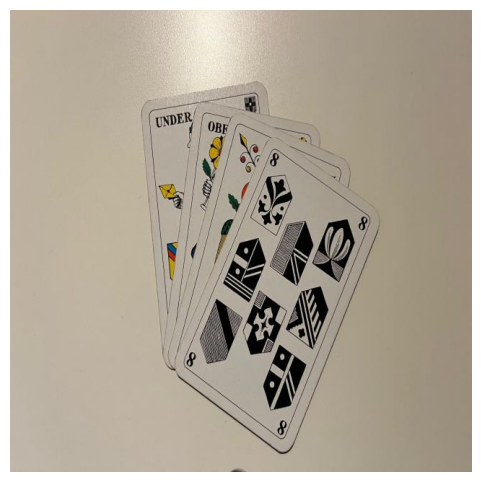

In [70]:
# Load a random test image and display it
test_image = random_test_image()
display_img(test_image, 6)

In [71]:
# Function for making a detection and classification with the loaded model
# conf = confidence threshold
def classify(model, conf, img):
    results = model(img, conf=conf)
    display_img(results[0].plot(), 6)

In [72]:
results = model(test_image, conf=0.7)


0: 640x640 1 Eichel Ass, 1 Rose Ober, 1 Schilte 7, 1 Schilte Under, 6.5ms
Speed: 2.7ms preprocess, 6.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [74]:
results = model(test_image, conf=0.7) # Make one prediction

result = results[0] # 
boxes = result.boxes

for i in range(len(boxes)):
    cls_id = int(boxes.cls[i]) # Card id
    conf = float(boxes.conf[i]) # confidence
    class_name = result.names[cls_id]
    print(cls_id)
    print(conf)
    print(class_name)


0: 640x640 1 Eichel Ass, 1 Rose Ober, 1 Schilte 7, 1 Schilte Under, 14.9ms
Speed: 2.2ms preprocess, 14.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
35
0.9255268573760986
Schilte Under
29
0.8520134091377258
Schilte 7
5
0.834506094455719
Eichel Ass
16
0.7772576212882996
Rose Ober



0: 640x640 2 Eichel Asss, 1 Eichel Under, 1 Rose Ober, 1 Rose Under, 1 Schilte 7, 1 Schilte Under, 14.7ms
Speed: 2.2ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


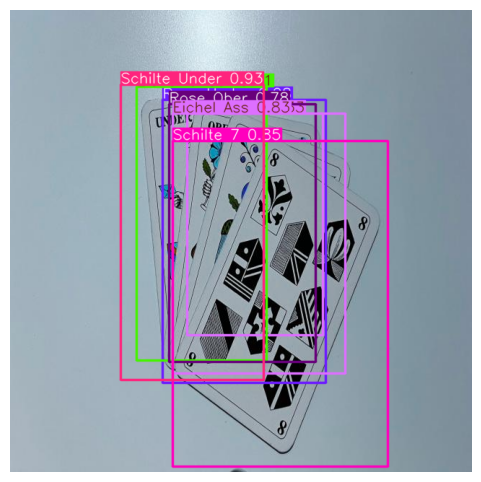

In [75]:
classify(model, 0.1, test_image)

### Automatic Evaluation on Testset

In [77]:
model.val(data='/exchange/dspro2/jassair/r_3to5_36c_ovlp/data.yaml', split='test')

Ultralytics 8.3.114 🚀 Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA A16, 14891MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1032.0±182.6 MB/s, size: 44.4 KB)


val: Scanning /exchange/dspro2/jassair/r_3to5_36c_ovlp/test/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 690.69it/s]

val: New cache created: /exchange/dspro2/jassair/r_3to5_36c_ovlp/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


                   all          5         19      0.727      0.924      0.995      0.858
              Eichel 6          1          1      0.751          1      0.995      0.995
            Eichel Ass          1          1       0.63          1      0.995      0.895
           Eichel Ober          1          1      0.764          1      0.995      0.796
          Eichel Under          1          1      0.418          1      0.995      0.995
               Rose 10          1          1      0.713          1      0.995      0.895
                Rose 6          1          1      0.424          1      0.995      0.796
                Rose 7          2          2          1      0.706      0.995      0.801
             Rose Ober          1          1          1          0      0.995      0.895
            Rose Under          1          1      0.444          1      0.995      0.697
             Schelle 8          1          1      0.776          1      0.995      0.895
           Schelle As

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  5,  7,  8,  9, 10, 11, 16, 17, 21, 23, 24, 25, 26, 29, 30, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7faf39c50a70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04